## Model simuleren: populatiemodel

$$\frac{dv}{dt}= r_{v}v (1-\frac{v}{K_{v}}) - d_{nv}v$$
$$\frac{dm_{1}}{dt}=r_{1}m_{1}(1-\frac{m_{1}+m_{2}}{K_{M}})-\alpha_{1}vm_{1}-d_{n1}m_{1}$$
$$\frac{dm_{2}}{dt}=r_{2}m_{2}(1-\frac{m_{1}+m_{2}}{K_{M}})-\alpha_{2}vm_{2}-d_{n2}m_{2}+m_{2,in}$$

In [2]:
%matplotlib inline

In [3]:
# Importeren van functionaliteiten
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import Image
from ipywidgets import interact, fixed
%load_ext autoreload
%autoreload 1
%aimport populatie
#from populatie import populatie_model   # Importeren van de populatie functies

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Praktische info
Functiedefinitie:

    populatie.populatie_model(tijdstappen,  v_0, m1_0, m2_0, r_v, K_v, K_m, d_nv, d_n1, d_n2, r_1, r_2, alpha_1, alpha_2, m2_in)

Bij de standaard situatie voor onze case werden volgende waarden voor initiele condities, parameters en inputs gebruikt:

    populatie.populatie_model(np.arange(0, 22, 0.1), 3, 1000, 1000, 1, 10, 8000, 0.06, 0.9, 1, 14.2, 12.1, 0.00005, 0.00006, 100) 

## Model simuleren

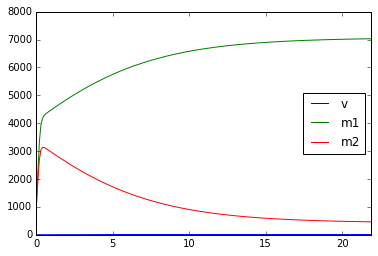

In [4]:
model = populatie.populatie_model(np.arange(0., 22, 0.1), 3, 1000, 1000, 1, 10, 8000, 0.06, 
                                  0.9, 1, 14.2, 12.1, 0.00005, 0.00006, 100)

Aangezien $v$ volledig andere eenheden heeft dan $m_1$ en $m_2$, is het logischer $v$ op een andere schaal weer te geven.

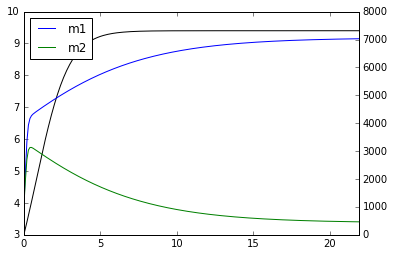

In [5]:
v = pd.DataFrame({'v': model['v']}) 
fig, ax1 = plt.subplots()              # We zetten een grafiek klaar
ax1_twin = ax1.twinx()                 # We zorgen voor een dubbele y-as
v.plot(ax=ax1, style='k')              # We plotten eerst v in het zwart
model[['m1', 'm2']].plot(ax=ax1_twin)  # We plotten nu ook m1 en m2, maar op de 'twin'-as

$$\frac{dv}{dt}= r_{v}v (1-\frac{v}{K_{v}}) - d_{nv}v$$
$$\frac{dm_{1}}{dt}=r_{1}m_{1}(1-\frac{m_{1}+m_{2}}{K_{M}})-\alpha_{1}vm_{1}-d_{n1}m_{1}$$
$$\frac{dm_{2}}{dt}=r_{2}m_{2}(1-\frac{m_{1}+m_{2}}{K_{M}})-\alpha_{2}vm_{2}-d_{n2}m_{2}+m_{2,in}$$

## Impact initiële conditie en input

In [6]:
interact(populatie.populatie_model, tijdstappen=fixed(np.arange(0., 22, 0.1)), v_0=fixed(3), 
         m1_0=(0,2000,100), m2_0=(0,2000,100), r_v=fixed(1), K_v=fixed(10), K_m=fixed(8000), 
         d_nv=fixed(0.06), d_n1=fixed(0.9), d_n2=fixed(1), r_1=fixed(14.2), r_2=fixed(12.1), 
         alpha_1=fixed(0.00005), alpha_2=fixed(0.00006), m2_in=(800,1200,10), returnDataFrame=fixed(False));

interactive(children=(IntSlider(value=1000, description='m1_0', max=2000, step=100), IntSlider(value=1000, description='m2_0', max=2000, step=100), IntSlider(value=1000, description='m2_in', max=1200, min=800, step=10), Checkbox(value=True, description='plotFig'), Output()), _dom_classes=('widget-interact',))

$$\frac{dv}{dt}= r_{v}v (1-\frac{v}{K_{v}}) - d_{nv}v$$
$$\frac{dm_{1}}{dt}=r_{1}m_{1}(1-\frac{m_{1}+m_{2}}{K_{M}})-\alpha_{1}vm_{1}-d_{n1}m_{1}$$
$$\frac{dm_{2}}{dt}=r_{2}m_{2}(1-\frac{m_{1}+m_{2}}{K_{M}})-\alpha_{2}vm_{2}-d_{n2}m_{2}+m_{2,in}$$

## Impact parameters (deel 1)

In [7]:
interact(populatie.populatie_model, tijdstappen=fixed(np.arange(0., 22, 0.1)), v_0=fixed(3), 
         m1_0=fixed(1000), m2_0=fixed(1000), r_v=fixed(1), K_v=(0,20,1), K_m=(0,16000,500), 
         d_nv=fixed(0.06), d_n1=fixed(0.9), d_n2=fixed(1), r_1=fixed(14.2), r_2=fixed(12.1), 
         alpha_1=fixed(0.00005), alpha_2=fixed(0.00006), m2_in=fixed(100), returnDataFrame=fixed(False));

interactive(children=(IntSlider(value=10, description='K_v', max=20), IntSlider(value=8000, description='K_m', max=16000, step=500), Checkbox(value=True, description='plotFig'), Output()), _dom_classes=('widget-interact',))

$$\frac{dv}{dt}= r_{v}v (1-\frac{v}{K_{v}}) - d_{nv}v$$
$$\frac{dm_{1}}{dt}=r_{1}m_{1}(1-\frac{m_{1}+m_{2}}{K_{M}})-\alpha_{1}vm_{1}-d_{n1}m_{1}$$
$$\frac{dm_{2}}{dt}=r_{2}m_{2}(1-\frac{m_{1}+m_{2}}{K_{M}})-\alpha_{2}vm_{2}-d_{n2}m_{2}+m_{2,in}$$

## Impact parameters (deel 2)

In [8]:
interact(populatie.populatie_model, tijdstappen=fixed(np.arange(0., 22, 0.1)), v_0=fixed(3), 
         m1_0=fixed(1000), m2_0=fixed(1000), r_v=fixed(1), K_v=fixed(10), K_m=fixed(8000), 
         d_nv=fixed(0.06), d_n1=(0,1.8,0.1), d_n2=(0,2,0.1), r_1=fixed(14.2), r_2=fixed(12.1), 
         alpha_1=fixed(0.00005), alpha_2=fixed(0.00006), m2_in=fixed(100), returnDataFrame=fixed(False));

interactive(children=(FloatSlider(value=0.9, description='d_n1', max=1.8), FloatSlider(value=1.0, description='d_n2', max=2.0), Checkbox(value=True, description='plotFig'), Output()), _dom_classes=('widget-interact',))

$$\frac{dv}{dt}= r_{v}v (1-\frac{v}{K_{v}}) - d_{nv}v$$
$$\frac{dm_{1}}{dt}=r_{1}m_{1}(1-\frac{m_{1}+m_{2}}{K_{M}})-\alpha_{1}vm_{1}-d_{n1}m_{1}$$
$$\frac{dm_{2}}{dt}=r_{2}m_{2}(1-\frac{m_{1}+m_{2}}{K_{M}})-\alpha_{2}vm_{2}-d_{n2}m_{2}+m_{2,in}$$

## Impact parameters (deel 3)

In [9]:
interact(populatie.populatie_model, tijdstappen=fixed(np.arange(0., 22, 0.1)), v_0=fixed(3),
         m1_0=fixed(1000), m2_0=fixed(1000), r_v=fixed(1), K_v=fixed(10), K_m=fixed(8000),
         d_nv=fixed(0.06), d_n1=fixed(0.9), d_n2=fixed(1), r_1=(0,30,0.2), r_2=(0,30, 0.2),
         alpha_1=fixed(0.00005), alpha_2=fixed(0.00006), m2_in=fixed(100), returnDataFrame=fixed(False));

interactive(children=(FloatSlider(value=15.0, description='r_1', max=30.0, step=0.2), FloatSlider(value=15.0, description='r_2', max=30.0, step=0.2), Checkbox(value=True, description='plotFig'), Output()), _dom_classes=('widget-interact',))

$$\frac{dv}{dt}= r_{v}v (1-\frac{v}{K_{v}}) - d_{nv}v$$
$$\frac{dm_{1}}{dt}=r_{1}m_{1}(1-\frac{m_{1}+m_{2}}{K_{M}})-\alpha_{1}vm_{1}-d_{n1}m_{1}$$
$$\frac{dm_{2}}{dt}=r_{2}m_{2}(1-\frac{m_{1}+m_{2}}{K_{M}})-\alpha_{2}vm_{2}-d_{n2}m_{2}+m_{2,in}$$

## Impact parameters (deel 4)

In [10]:
interact(populatie.populatie_model, tijdstappen=fixed(np.arange(0., 22, 0.1)), v_0=fixed(3), 
         m1_0=fixed(1000), m2_0=fixed(1000), r_v=fixed(1), K_v=fixed(10), K_m=fixed(8000), 
         d_nv=fixed(0.06), d_n1=fixed(0.9), d_n2=fixed(1), r_1=fixed(14.2), r_2=fixed(12.1), 
         alpha_1=(0,1e-4,1e-5), alpha_2=(0,1e-4,1e-5), m2_in=fixed(100), returnDataFrame=fixed(False));

interactive(children=(FloatSlider(value=5e-05, description='alpha_1', max=0.0001, step=1e-05), FloatSlider(value=5e-05, description='alpha_2', max=0.0001, step=1e-05), Checkbox(value=True, description='plotFig'), Output()), _dom_classes=('widget-interact',))

$$\frac{dv}{dt}= r_{v}v (1-\frac{v}{K_{v}}) - d_{nv}v$$
$$\frac{dm_{1}}{dt}=r_{1}m_{1}(1-\frac{m_{1}+m_{2}}{K_{M}})-\alpha_{1}vm_{1}-d_{n1}m_{1}$$
$$\frac{dm_{2}}{dt}=r_{2}m_{2}(1-\frac{m_{1}+m_{2}}{K_{M}})-\alpha_{2}vm_{2}-d_{n2}m_{2}+m_{2,in}$$